In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the data
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/nlp/main/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Drop unwanted columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Rename columns
df = df.rename(columns={'v1':'label','v2':'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#shape of dataset
df.shape

(5572, 2)

In [8]:
#Length of the text
df['length'] = df.text.str.len()

df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
#Count of frequency of the label classes
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
#label Encoding
df = df.replace({'ham': 0,'spam':1})
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
#Convert all the messages into lower case
df['text'] = df['text'].str.lower()

df.head()

,label,text,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [13]:
#Replace email address with 'email'
df['text'] = df['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#Replace URLs with 'webaddress'
df['text'] = df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
df['text'] = df['text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone numbers with 'phonenumber'
df['text'] = df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#Replace numbers with 'numbr'
df['text'] = df['text'].str.replace(r'\d+(\.\d+)?','numbr')

In [15]:
#Remove punctuation
df['text'] = df['text'].str.replace(r'[^\w\d\s]',' ')

#Remove whitespace between terms with a single space
df['text'] = df['text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['text'] = df['text'].str.replace(r'^\s+|\s+?$', '')

df.head()

,label,text,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [16]:
#Cleaned text after doing pre-processing
df['New Length_1'] = df['text'].str.len()

df.head()

,label,text,length,New Length
0,0,go until jurong point crazy available only in ...,111,102
1,0,ok lar joking wif u oni,29,23
2,1,free entry in numbr a wkly comp to win fa cup ...,155,159
3,0,u dun say so early hor u c already then say,49,43
4,0,nah i don t think he goes to usf he lives arou...,61,60


In [17]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['text'] = df['text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [19]:
#Cleaned text after doing pre-processing
df['New Length_1'] = df['text'].str.len()

df.head()

,label,text,length,New Length,New Length_1
0,0,go jurong point crazy available bugis n great ...,111,102,82
1,0,ok lar joking wif oni,29,23,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,159,139
3,0,dun say early hor c already say,49,43,31
4,0,nah think goes usf lives around though,61,60,38


In [20]:
print("Original Length :",df['length'].sum())
print('Cleaned Length  :',df['New Length_1'].sum())

Original Length : 446422
Cleaned Length  : 300564


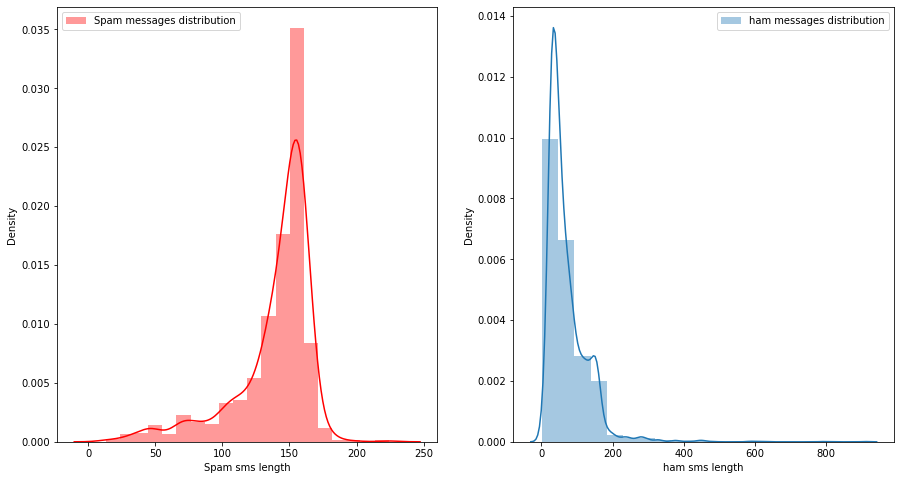

In [21]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

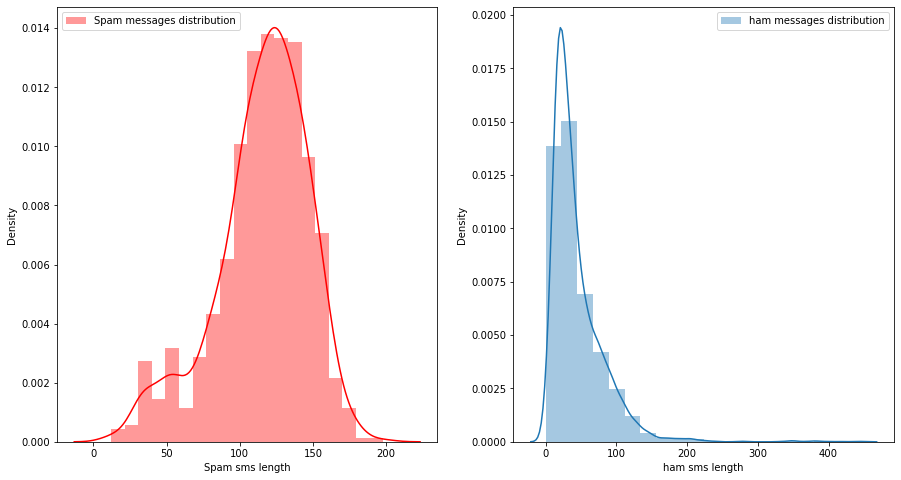

In [22]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['New Length_1'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['New Length_1'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

In [31]:
from wordcloud import WordCloud

b = df['text'][df['label']==1]

In [34]:
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(b))

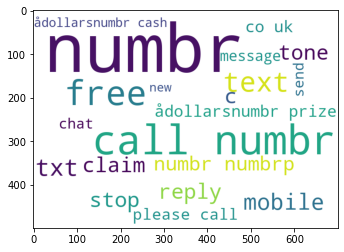

In [35]:
plt.imshow(spam_cloud)

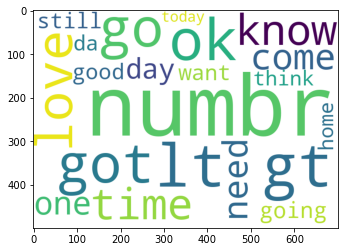

In [37]:
c = df['text'][df['label']==0]
spam_cloud1 = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(c))
plt.imshow(spam_cloud1)

# Model Building

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [77]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text']).toarray()
Y = df['label']

In [78]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42)

In [81]:
X_train.shape

(4179, 7843)

In [67]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [68]:
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
accuracy_score(y_test,y_pred)

0.9705671213208902

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.79      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



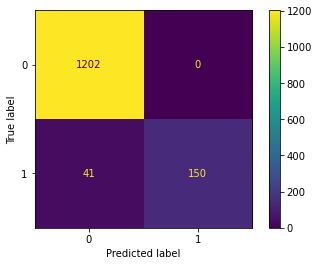

In [73]:
plot_confusion_matrix(nb,X_test,y_test)

In [74]:
confusion_matrix(y_test,y_pred)

array([[1202,    0],
       [  41,  150]], dtype=int64)

In [82]:
gb = GaussianNB()
gb.fit(X_train,y_train)
y_gb = gb.predict(X_test)
print(y_gb)
print("Accuracy Score : ",accuracy_score(y_test,y_gb))
print("Classification Report : ",classification_report(y_test,y_gb))
print("Confusion Matrix : ",confusion_matrix(y_test,y_gb))

[0 0 1 ... 0 0 1]
Accuracy Score :  0.8801148600143575
Classification Report :                precision    recall  f1-score   support

           0       0.98      0.88      0.93      1202
           1       0.54      0.88      0.67       191

    accuracy                           0.88      1393
   macro avg       0.76      0.88      0.80      1393
weighted avg       0.92      0.88      0.89      1393

Confusion Matrix :  [[1058  144]
 [  23  168]]


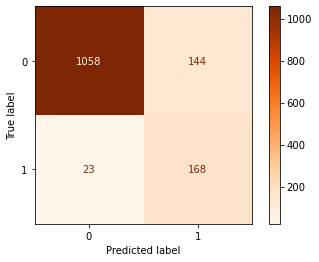

In [85]:
plot_confusion_matrix(gb,X_test,y_test,cmap='Oranges')

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
print(y_lr)
print("Accuracy Score : ",accuracy_score(y_test,y_lr))
print("Classification Report : ",classification_report(y_test,y_lr))
print(confusion_matrix(y_test,y_lr))

[0 0 1 ... 0 0 0]
Accuracy Score :  0.9669777458722182
Classification Report :                precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       0.98      0.77      0.87       191

    accuracy                           0.97      1393
   macro avg       0.97      0.89      0.92      1393
weighted avg       0.97      0.97      0.97      1393

[[1199    3]
 [  43  148]]


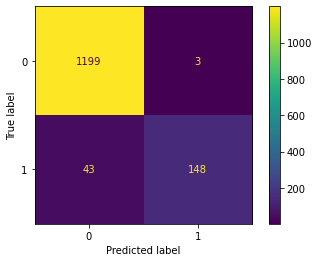

In [88]:
plot_confusion_matrix(lr,X_test,y_test)